# Facsimile Lyric Imitator


1.   Pre-Processing
2.   Keyword List
3.   Build Markov Model
4.   Lyric Generaton





## 1) Input & Pre-Processing

### Data Extraction

In [ ]:
!pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /tmp/pip-req-build-vycxqtdt
  Running command git clone -q https://github.com/johnwmillr/LyricsGenius.git /tmp/pip-req-build-vycxqtdt
  Created wheel for lyricsgenius: filename=lyricsgenius-3.0.1-py3-none-any.whl size=44687 sha256=5366ae5fa72115d958e7c94888f289b28fe8bae4f96bdf44e991ce151c4977b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-_o0gvttt/wheels/12/d5/2b/6b771ebb067bceb8816ec5eef0dd0d36bf069b18f03ac8ca20
Successfully built lyricsgenius


In [ ]:
client_access_token = "SZ3jTuHWq9xKyFgcAZvDhg_wWsUOBjQtfb0mxnd3n9-zCybDEceF9oSkrEhadPBQ"

In [ ]:
import lyricsgenius
LyricsGenius = lyricsgenius.Genius(client_access_token)

In [ ]:
from bs4 import BeautifulSoup
import re
import lyricsgenius
import requests
import pandas as pd
from pprint import pprint

In [ ]:
#regex function to clean song data
def clean_up(song_title):
    if "Ft" in song_title:
        before_ft_pattern = re.compile(".*(?=\(Ft)")
        song_title_before_ft = before_ft_pattern.search(song_title).group(0)
        clean_song_title = song_title_before_ft.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    else:
        song_title_no_lyrics = song_title.replace("Lyrics", "")
        clean_song_title = song_title_no_lyrics.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    return clean_song_title

In [ ]:
#function to get songs from album
def get_all_song_titles_from_album(artist, album_name):
    artist = artist.replace(" ", "-")
    album_name = album_name.replace(" ", "-")
    
    response = requests.get(f"https://genius.com/albums/{artist}/{album_name}")
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    song_title_tags = document.find_all("h3", attrs={"class": "chart_row-content-title"})
    song_titles = [song_title.text for song_title in song_title_tags]
    
    clean_songs = []
    for song_title in song_titles:
        clean_song = clean_up(song_title)
        clean_songs.append(clean_song)
        
    return clean_songs

In [ ]:
def clean_song(song):
    song = song.lower()
    song = re.sub('[^A-Za-z0-9-\']', ' ', song)
    song = song.replace("'","")
    return song

In [ ]:
#download the album lyrics
def album_to_df(artist, album_name): 
    data = [] #list to store all the song data

    LyricsGenius = lyricsgenius.Genius(client_access_token)  # Set up LyricsGenius with your Genius API client access token
    LyricsGenius.remove_section_headers = True
    
    # With the function that we previously created, go to Genius.com and get all song titles for a particular artist's album
    clean_songs = get_all_song_titles_from_album(artist, album_name) 

    for song in clean_songs:        
        song_object = LyricsGenius.search_song(song, artist) #For each song in the list, search for that song with LyricsGenius
        if song_object != None: #If the song is not empty
          lyrics = song_object.lyrics
          lyrics = re.sub(r'\w{0,13} Lyrics\n','', lyrics)
          lyrics = re.sub(r'\d{,3}Embed','', lyrics)
          data.append({'Title' : song, 'Lyrics': lyrics})#B Lyrics\n
        
        else:  #If the song doesn't contain lyrics
            print('No lyrics')
    return pd.DataFrame(data, columns = ['Title', 'Lyrics']) #create and return data frame

In [ ]:
syre = album_to_df("Jaden", "Syre")

Searching for "B" by Jaden...
Done.
Searching for "L" by Jaden...
Done.
Searching for "U" by Jaden...
Done.
Searching for "E" by Jaden...
Done.
Searching for "Breakfast" by Jaden...
Done.
Searching for "Hope" by Jaden...
Done.
Searching for "Falcon" by Jaden...
Done.
Searching for "Ninety" by Jaden...
Done.
Searching for "Lost Boy" by Jaden...
Done.
Searching for "Batman" by Jaden...
Done.
Searching for "Icon" by Jaden...
Done.
Searching for "Watch Me" by Jaden...
Done.
Searching for "Fallen" by Jaden...
Done.
Searching for "The Passion" by Jaden...
Done.
Searching for "George Jeff" by Jaden...
Done.
Searching for "Rapper" by Jaden...
Done.
Searching for "SYRE" by Jaden...
Done.


In [ ]:
syre

,Title,Lyrics
0,B,Thy hair inspired God to make the breeze\nThy ...
1,L,I could put you on a wave\nI just put you on a...
2,U,I was tryin' to love you but we\n(Falling down...
3,E,So I dream in color\nI found Eve sleeping with...
4,Breakfast,"\nAlright, nigga, no more fun and games, let's..."
5,Hope,"Baby girl, I just hope\nWhen I grow up I can k..."
6,Falcon,"You got the cash, well I'm about to come and e..."
7,Ninety,"“Love.”\n""The United States—and the White Hous..."
8,Lost Boy,"Lost I was a lost boy, I was a lost boy in my ..."
9,Batman,"Yeah, yeah\n\nBatman, Batman, Batman\nJoker ju..."


### Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def get_all_words(songs):
    words = {}
    stop_words = nltk.corpus.stopwords.words('english')
    stops = {}
    for song in songs :
      song = song.lower()
      song = re.sub('[^A-Za-z0-9-\']', ' ', song)
      for line in song.split('\n'):
        for word in line.split(' '):
          if word in stop_words:
            if word not in stops:
              stops[word] = 1
            else:
              stops[word] +=1
          else:
            if len(word) == 1 and ( word != 'a' and word != 'i'):
              continue
            else:
                if word not in words:
                  words[word] = 1
                else:
                  words[word]+=1
    return words, stops




In [ ]:
all_words, stop_vals = get_all_words(syre['Lyrics'])

print(all_words)
print(stop_vals)

print(sum(all_words.values()))
stop_word_val = round((sum(stop_vals.values())/len(stop_vals.values()))/len(syre))
print(f'value for all stop words {stop_word_val}')

{'thy': 9, 'hair': 5, 'inspired': 9, 'god': 12, 'make': 23, 'breeze': 5, 'lips': 5, 'man': 28, 'rib': 4, 'angel': 5, 'born': 5, 'eve': 8, 'formed': 4, 'flesh': 4, 'promised': 4, 'hand': 14, '': 1686, 'cry': 5, 'night': 17, 'still': 23, "can't": 11, 'sleep': 8, 'without': 3, 'nyquil': 1, 'stressed': 1, 'fight': 4, 'ever': 5, 'get': 32, 'right': 10, "'cause": 8, 'lay': 2, 'eden': 1, 'stars': 3, 'show': 6, 'us': 30, 'choose': 1, 'take': 15, 'home': 13, 'happy': 2, 'would': 14, 'die': 12, 'arms': 2, 'ocean': 8, 'makes': 2, 'blue': 21, 'oh': 18, 'well': 14, 'lately': 4, 'baby': 47, 'give': 4, 'fuck': 10, "i'm": 190, 'sick': 4, 'kissing': 2, 'used': 2, 'miss': 4, 'taking': 3, 'pics': 3, 'club': 1, 'pull': 3, 'zipper': 1, 'start': 6, 'think': 13, 'wait': 9, 'nah': 25, 'fell': 4, 'see': 23, 'living': 23, 'icarus': 1, 'relationships': 1, 'suck': 2, "lookin'": 3, 'around': 10, 'girl': 47, 'happened': 7, 'hate': 5, 'soon': 5, "i'll": 20, 'winning': 1, 'plaque': 2, 'mad': 4, 'accuracy': 1, 'swaggy

## 2) Keyword list

### Highest Frequency

In [ ]:
def update_vals(word_vals,words_dict):
    for key, value in words_dict.items():
      if key in word_vals:
        word_vals[key] +=1 
      else:
        word_vals[key] = value

In [ ]:
import itertools 

# Document Frequency So its value is based on how much it occurs in the song albums
def word_doc_freq(album):
    word_vals = {}
    stop_words = nltk.corpus.stopwords.words('english')
    for title, song in zip(album['Title'],album['Lyrics']):
      song = song.lower()
      song = re.sub('[^A-Za-z0-9-\']', ' ', song)
      for line in song.split('\n'):
        words = set(line.split(' '))
        words_dict = dict.fromkeys(words, 1)
        update_vals(word_vals,words_dict)
    return word_vals

In [ ]:
import itertools 

# Document Frequency So its value is based on how much it occurs in the song albums
def word_ffreq(album):
    word_vals = {}
    for title, song in zip(album['Title'],album['Lyrics']):
      song = song.lower()
      song = re.sub('[^A-Za-z0-9-\']', ' ', song)
      for line in song.split('\n'):
        words = line.split(' ')
        for word in words:
          if word not in word_vals:
            word_vals[word] = 1
          else:
            word_vals[word] = word_vals[word]+1
    return word_vals

In [ ]:
freq = word_doc_freq(syre)

print(freq)

{'': 17, 'god': 4, 'kissing': 1, 'stressed': 1, 'crack': 1, 'from': 8, 'do': 14, 'why': 10, 'make': 10, 'think': 8, 'would': 6, 'mad': 3, 'choose': 1, 'home': 5, 'loved': 3, 'hate': 3, 'lips': 3, 'my': 16, 'us': 10, 'club': 1, 'your': 16, 'makes': 2, 'chief': 1, 'of': 15, 'man': 11, 'here': 8, 'soon': 4, 'accuracy': 1, 'beat': 4, 'now': 14, 'living': 7, 'selling': 2, 'come': 10, 'give': 4, 'better': 6, 'hand': 5, 'it': 17, 'hard': 3, 'under': 3, 'no': 13, 'zipper': 1, 'take': 9, 'eve': 3, 'plaque': 1, "don't": 16, 'still': 9, 'you-you': 1, 'broke': 2, 'miss': 2, 'right': 9, 'icarus': 1, 'nah': 2, 'will': 9, 'an': 7, 'wanna': 9, 'her': 9, 'fell': 3, 'die': 5, 'rap': 3, 'pics': 2, 'be': 13, 'world': 4, 'at': 13, 'happened': 4, 'to': 17, 'cry': 4, 'even': 7, 'cops': 2, 'in': 17, 'away': 4, 'they': 14, 'up': 16, 'fuck': 6, 'i': 17, 'relationships': 1, 'see': 9, 'know': 13, 'into': 5, 'tell': 8, 'out': 12, 'wait': 4, 'but': 13, 'winning': 1, 'you': 17, 'secrets': 4, 'flesh': 2, 'run': 8, 'h

In [ ]:
freqf = word_ffreq(syre)
print(freqf)

{'thy': 9, 'hair': 5, 'inspired': 9, 'god': 12, 'to': 182, 'make': 23, 'the': 421, 'breeze': 5, 'lips': 5, 'a': 254, 'man': 28, 'and': 153, 'from': 25, 'his': 16, 'rib': 4, 'an': 21, 'angel': 5, 'born': 5, 'as': 21, 'eve': 8, 'formed': 4, 'into': 10, 'flesh': 4, 'promised': 4, 'him': 16, 'her': 20, 'hand': 14, '': 1686, 'why': 22, 'do': 45, 'i': 426, 'cry': 5, 'at': 28, 'night': 17, 'still': 23, "can't": 11, 'sleep': 8, 'without': 3, 'nyquil': 1, 'stressed': 1, 'out': 43, 'because': 7, 'we': 109, 'fight': 4, 'will': 21, 'ever': 5, 'get': 32, 'this': 69, 'right': 10, "'cause": 8, 'no': 63, 'more': 10, 'so': 80, 'lay': 2, 'me': 137, 'down': 44, 'in': 136, 'eden': 1, 'under': 3, 'stars': 3, 'show': 6, "it's": 25, 'us': 30, 'that': 79, 'he': 29, 'choose': 1, 'take': 15, 'home': 13, 'if': 22, 'happy': 2, 'would': 14, 'die': 12, 'here': 11, 'your': 74, 'arms': 2, "don't": 68, 'ocean': 8, 'makes': 2, 'blue': 21, 'oh': 18, 'well': 14, 'lately': 4, 'baby': 47, 'give': 4, 'fuck': 10, "i'm": 190,

### Sentiment List

In [ ]:
pip install vadersentiment

     |████████████████████████████████| 125 kB 4.9 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
all_words = list(freq.keys())+ list(stop_vals.keys())
all_words

['',
 'god',
 'kissing',
 'stressed',
 'crack',
 'from',
 'do',
 'why',
 'make',
 'think',
 'would',
 'mad',
 'choose',
 'home',
 'loved',
 'hate',
 'lips',
 'my',
 'us',
 'club',
 'your',
 'makes',
 'chief',
 'of',
 'man',
 'here',
 'soon',
 'accuracy',
 'beat',
 'now',
 'living',
 'selling',
 'come',
 'give',
 'better',
 'hand',
 'it',
 'hard',
 'under',
 'no',
 'zipper',
 'take',
 'eve',
 'plaque',
 "don't",
 'still',
 'you-you',
 'broke',
 'miss',
 'right',
 'icarus',
 'nah',
 'will',
 'an',
 'wanna',
 'her',
 'fell',
 'die',
 'rap',
 'pics',
 'be',
 'world',
 'at',
 'happened',
 'to',
 'cry',
 'even',
 'cops',
 'in',
 'away',
 'they',
 'up',
 'fuck',
 'i',
 'relationships',
 'see',
 'know',
 'into',
 'tell',
 'out',
 'wait',
 'but',
 'winning',
 'you',
 'secrets',
 'flesh',
 'run',
 'happy',
 'stars',
 'knew',
 'show',
 'suck',
 "i'll",
 'blue',
 'all',
 'tragic',
 'start',
 'after',
 'breeze',
 'hair',
 'for',
 'angel',
 'on',
 'pass',
 'arms',
 'swaggy',
 'day',
 'follow',
 "can

In [ ]:
def get_senti_words(word_list):
    senti_words = set([])
    for word in word_list:
        vs = SentimentIntensityAnalyzer().polarity_scores(word)
        if (vs['pos'] >0 or  vs['neg'] >0):
          senti_words.add(word)
    return list(senti_words)

In [ ]:
get_senti_words(all_words)

['selfish',
 'god',
 'attacking',
 'honest',
 'kissing',
 'embarrassed',
 'freedom',
 'stressed',
 'funeral',
 'gloomy',
 'bliss',
 'confusing',
 'damn',
 'play',
 'treasures',
 'doubting',
 'lobbying',
 'niggas',
 'stupid',
 'forgive',
 'shit',
 'scared',
 'mistakes',
 'please',
 'relax',
 'nuts',
 'fears',
 'passionate',
 'kissed',
 'mad',
 'true',
 'worry',
 'fallen',
 'worried',
 'prosecuted',
 'loved',
 'criminal',
 'hate',
 'mess',
 'riches',
 'rich',
 'yeah',
 'wrong',
 'shits',
 'abilities',
 'wish',
 "'fit",
 'block',
 'exhausted',
 'forget',
 'menace',
 'free',
 'struggles',
 'vicious',
 'lobby',
 'noble',
 'kisses',
 'defeated',
 'lies',
 'excuse',
 'better',
 'innocent',
 'save',
 'surprised',
 'hero',
 'loving',
 'awesome',
 'hand',
 'harsh',
 'hard',
 'villain',
 'cut',
 'cutie',
 'feeling',
 'killing',
 'no',
 'alone',
 'glad',
 'prison',
 'strong',
 'mischief',
 'clean',
 'top',
 'broke',
 'miss',
 'value',
 'calmed',
 'truth',
 'fire',
 'hope',
 'drop',
 'death',
 'hea

##3) Markov Model

In [ ]:
def create_markov_chain(songs):
    chain = {} # keys (prefix,suffix) [coresponding words]
    c = 1
    for song in songs:
      chain_for_song(chain,song)
    return chain

In [ ]:
def chain_for_song(chain,song):
    pref1 = '\n'
    pref2 = '\n'
    val = ''
    for line in song.split('\n'):
      line = re.sub('[^A-Za-z0-9-\']', ' ', song.lower())
      line = line.replace('  ', ' ')
      for word in line.split(' '):
        val = word
        key = (pref1, pref2)
        if key not in chain:
          chain[key] = {val:1}
        else:
          if word in chain[key]:
            chain[key][word]+=1
          else:
            chain[key][word] =1
        pref1 = pref2 
        pref2 = val

In [ ]:
markov_chain = create_markov_chain(syre['Lyrics'])
markov_chain

{('\n', '\n'): {'': 3,
  'baby': 1,
  'george': 1,
  'i': 2,
  'lost': 1,
  'so': 1,
  'syre': 1,
  'the': 1,
  'thy': 1,
  'watch': 1,
  'wooo': 1,
  'yeah': 2,
  'you': 1},
 ('\n', 'thy'): {'hair': 1},
 ('thy', 'hair'): {'inspired': 304},
 ('hair', 'inspired'): {'god': 304},
 ('inspired', 'god'): {'to': 560},
 ('god', 'to'): {'make': 560},
 ('to', 'make'): {'a': 475, 'it': 98, 'something': 65, 'the': 304},
 ('make', 'the'): {'breeze': 304, 'fire': 63, 'whole': 78},
 ('the', 'breeze'): {'': 48, 'thy': 256},
 ('breeze', 'thy'): {'lips': 256},
 ('thy', 'lips'): {'inspired': 256},
 ('lips', 'inspired'): {'god': 256},
 ('make', 'a'): {'call': 98, 'man': 256, "mil'": 63, 'movie': 156},
 ('a', 'man'): {'and': 208, 'named': 93, 'no': 48},
 ('man', 'and'): {'from': 208},
 ('and', 'from'): {'his': 256},
 ('from', 'his'): {'rib': 256},
 ('his', 'rib'): {'an': 256},
 ('rib', 'an'): {'angel': 256},
 ('an', 'angel'): {'born': 256},
 ('angel', 'born'): {'as': 256},
 ('born', 'as'): {'eve': 256},
 (

##4) Lyric Generation


###4a)Helper Functions

In [ ]:
def get_album():
    artist = input("Enter the name of the artist: ")
    album = input("Enter the name of the artist's album: ")
    return album_to_df(artist, album)


In [ ]:
def get_max(songs):
    sum = 0
    for song in songs:
      sum += len(song)
    max = round(sum/len(songs))
    return  max

def get_len(album):
    max = get_max(album['Lyrics'])
    len = int(input("Enter the length of lyric you wish to create: "))
    while len > max:
      len = int(input(f"Enter the length of lyric you wish to create it must be less than {max}: "))
    return len 

def get_senti_op():
    senti = True
    choice = str(input("Would you like sentiment to be considered? (Y/N) "))
    if choice not in ['y','Y']:
      senti = False
    return senti

In [ ]:
def get_word_value_dict(album, senti):
      all_words, stop_vals = get_all_words(album['Lyrics'])
      stop_word_val = round((sum(stop_vals.values())/len(stop_vals.values()))/len(syre))
      master_word_val = word_doc_freq(album)
      senti_list = []
      if senti:
        senti_list = get_senti_words(list(master_word_val.keys()))
      for word in master_word_val.items():
        if word in senti_list:
          master_word_val[word] = master_word_val[word]*2
        if word in stop_vals.keys():
          master_word_val[word] = stop_word_val
      return master_word_val


In [ ]:
def get_word_value_dictf(album, senti):
      all_words, stop_vals = get_all_words(album['Lyrics'])
      stop_word_val = round((sum(stop_vals.values())/len(stop_vals.values()))/len(syre))
      master_word_val = word_ffreq(album)
      senti_list = []
      if senti:
        senti_list = get_senti_words(list(master_word_val.keys()))
      for word in master_word_val.items():
        if word in senti_list:
          master_word_val[word] = master_word_val[word]*2
        if word in stop_vals.keys():
          master_word_val[word] = stop_word_val
      print(master_word_val)
      return master_word_val

In [ ]:
import random 

def get_highest_val(p_vals,wv_dic):
    max = -1 
    val = ''
    for key in p_vals.keys():
      nv = wv_dic[key]
      if nv > max:
        val = key
        max = nv
    if len(p_vals.keys()) > 3:
      val = random.choice(tuple(p_vals.keys()))
    return val

###4b)Main Pipeline


In [ ]:
def facsimilie_h(album, lyric_len,senti):
  word_value_dict = get_word_value_dict(album, senti)
  chain = create_markov_chain(album['Lyrics'])
  #print(word_value_dict)
  return new_lyric( word_value_dict, chain, lyric_len)

In [ ]:
def new_lyric( wv_dic, chain,nwords):
  lyric = []
  pref1 = '\n'
  pref2 = '\n'
  val = ''
  pref = (pref1,pref2)
  while len(lyric) < nwords:
    p_vals = chain[pref]
    val = get_highest_val(p_vals,wv_dic)
    lyric.append(val)
    pref = (pref2,val)
    pref2 = val
  print(' '.join(lyric))

In [ ]:
def facsimilie():
  album = get_album()
  lyric_len = get_len(album)
  senti = get_senti_op()
  return facsimilie_h(album, lyric_len,senti)

### 4c) Main Pipline word Frequency

In [ ]:
def ffacsimilie_h(album, lyric_len,senti):
  word_value_dict = get_word_value_dictf(album, senti)
  chain = create_markov_chain(album['Lyrics'])
  #print(word_value_dict)
  return new_lyric( word_value_dict, chain, lyric_len)

In [ ]:
def ffacsimilie():
  album = get_album()
  lyric_len = get_len(album)
  senti = get_senti_op()
  return facsimilie_h(album, lyric_len,senti)

## Lyric Generation Test

### Game


In [ ]:
facsimilie()

Enter the name of the artist: Lin-Manuel Miranda
Enter the name of the artist's album: Hamilton: An American Musical (Original Broadway Cast Recording)


ZeroDivisionError: ignored

In [ ]:
facsimilie()

Enter the name of the artist: lin miranda
Enter the name of the artist's album: hamilton


ZeroDivisionError: ignored

In [ ]:
facsimilie()

Enter the name of the artist: daniel caesar
Enter the name of the artist's album: case study 01
Searching for "ENTROPY" by daniel caesar...
Done.
Searching for "CYANIDE" by daniel caesar...
Done.
Searching for "LOVE AGAIN by Daniel Caesar & Brandy" by daniel caesar...
Done.
Searching for "FRONTAL LOBE MUZIK" by daniel caesar...
Done.
Searching for "OPEN UP" by daniel caesar...
Done.
Searching for "RESTORE THE FEELING" by daniel caesar...
Done.
Searching for "SUPERPOSITION" by daniel caesar...
Done.
Searching for "TOO DEEP TO TURN BACK" by daniel caesar...
Done.
Searching for "COMPLEXITIES" by daniel caesar...
Done.
Searching for "ARE YOU OK?" by daniel caesar...
Done.
Enter the length of lyric you wish to create: 65
Would you like sentiment to be considered? (Y/N) y
love i wake oh please do not resuscitate i know there's nothing new nothing  under the moon oh no spent many nights on you on you on you on you on you on you on you on you on you on you on you on you on you on you on you on

In [ ]:
facsimilie()

Enter the name of the artist: daniel caesar
Enter the name of the artist's album: freudian
Searching for "Get You" by daniel caesar...
Done.
Searching for "Best Part" by daniel caesar...
Done.
Searching for "Hold Me Down" by daniel caesar...
Done.
Searching for "Neu Roses (Transgressor’s Song)" by daniel caesar...
Done.
Searching for "Loose" by daniel caesar...
Done.
Searching for "We Find Love" by daniel caesar...
Done.
Searching for "Blessed" by daniel caesar...
Done.
Searching for "Take Me Away" by daniel caesar...
Done.
Searching for "Transform" by daniel caesar...
Done.
Searching for "Freudian" by daniel caesar...
Done.
Enter the length of lyric you wish to create: 65
Would you like sentiment to be considered? (Y/N) y
get through drought and famine natural disasters my baby has been around for me kingdoms have fallen angels be callin' none of that could ever make me feel so alive just be my lover boy you'll lead me to could you i love you danny  you are the reason ooh  the reason 

### Giveon

In [ ]:
facsimilie()

Enter the name of the artist: giveon
Enter the name of the artist's album: when its all said and done
Searching for "When It's All Said And Done" by giveon...
Done.
Searching for "Still Your Best" by giveon...
Done.
Searching for "Last Time" by giveon...
Done.
Searching for "Stuck On You" by giveon...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) y
{'': 4, 'it': 4, 'so': 3, 'get': 2, 'ah': 1, 'oh': 4, 'told': 2, 'all': 2, 'said': 1, 'here': 3, 'and': 4, 'oh-oh': 2, 'done': 1, 'mean': 1, 'the': 3, "tryin'": 1, 'her': 1, 'over': 2, 'you': 4, 'like': 4, 'i': 4, "i'ma": 2, 'not': 2, "that's": 4, 'gonna': 1, 'good': 1, 'promise': 1, "don't": 4, 'real': 3, 's': 1, 'knew': 1, 'give': 1, 'that': 4, 'for': 3, 'my': 3, 'shit': 1, "i'm": 4, 'nah': 2, 'what': 2, 'tried': 1, 'seriously': 1, 'gotta': 1, 'best': 2, 'take': 2, 'called': 1, "y'all": 1, 'quit': 1, 'proud': 1, 'when': 3, 'time': 3, 'just': 3, 'but': 4, 'last': 2, 'me': 4, 'baby': 

In [ ]:
ffacsimilie()

Enter the name of the artist: giveon
Enter the name of the artist's album: when its all said and done
Searching for "When It's All Said And Done" by giveon...
Done.
Searching for "Still Your Best" by giveon...
Done.
Searching for "Last Time" by giveon...
Done.
Searching for "Stuck On You" by giveon...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) y
still your best i don't want you just like that yeah yeah don't fight back hmm hmm baby don't get like that i got away just confess right now go ahead and say it baby just this don't make me regret it i don't want you just like that missed the way that i grabbed yeah your body knows me


In [ ]:
facsimilie()

Enter the name of the artist: giveon
Enter the name of the artist's album: when its all said and done
Searching for "When It's All Said And Done" by giveon...
Done.
Searching for "Still Your Best" by giveon...
Done.
Searching for "Last Time" by giveon...
Done.
Searching for "Stuck On You" by giveon...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) n
{'': 4, 'it': 4, 'so': 3, 'get': 2, 'ah': 1, 'oh': 4, 'told': 2, 'all': 2, 'said': 1, 'here': 3, 'and': 4, 'oh-oh': 2, 'done': 1, 'mean': 1, 'the': 3, "tryin'": 1, 'her': 1, 'over': 2, 'you': 4, 'like': 4, 'i': 4, "i'ma": 2, 'not': 2, "that's": 4, 'gonna': 1, 'good': 1, 'promise': 1, "don't": 4, 'real': 3, 's': 1, 'knew': 1, 'give': 1, 'that': 4, 'for': 3, 'my': 3, 'shit': 1, "i'm": 4, 'nah': 2, 'what': 2, 'tried': 1, 'seriously': 1, 'gotta': 1, 'best': 2, 'take': 2, 'called': 1, "y'all": 1, 'quit': 1, 'proud': 1, 'when': 3, 'time': 3, 'just': 3, 'but': 4, 'last': 2, 'me': 4, 'baby': 

In [ ]:
ffacsimilie()

Enter the name of the artist: giveon
Enter the name of the artist's album: when its all said and done
Searching for "When It's All Said And Done" by giveon...
Done.
Searching for "Still Your Best" by giveon...
Done.
Searching for "Last Time" by giveon...
Done.
Searching for "Stuck On You" by giveon...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) n
stuck on you more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more  sure  more


### Omar Apollo

In [ ]:
facsimilie()

Enter the name of the artist: omar apollo
Enter the name of the artist's album: stereo
Searching for "Stereo (Intro)" by omar apollo...
Done.
Searching for "Ignorin" by omar apollo...
Done.
Searching for "Erase" by omar apollo...
Done.
Searching for "Ugotme" by omar apollo...
Done.
Searching for "Hijo De Su Madre" by omar apollo...
Done.
Searching for "Lucky" by omar apollo...
Done.
Searching for "Amor Malo" by omar apollo...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) y
{'': 7, 'it': 6, 'please': 1, 'stereo': 1, 'all': 4, 'intro': 1, 'turn': 1, 'swerve': 1, 'need': 2, 'days': 1, 'drank': 1, 'the': 7, 'at': 3, 'really': 4, 'cars': 1, 'dijo': 1, 'hill': 1, 'you': 7, 'i': 7, 'turns': 1, 'baila': 1, 'keep': 1, 'fall': 1, 'tanto': 1, 'hope': 1, 'want': 2, "don't": 6, 'down': 1, 'three': 1, 'soul': 1, 'myself': 2, 'for': 7, 'my': 7, 'mind': 2, 'steering': 1, 'blue': 2, 'wheel': 1, 'shit': 3, 'este': 1, 'loose': 1, "i'm": 7, 'coasti

In [ ]:
facsimilie()

Enter the name of the artist: omar apollo
Enter the name of the artist's album: stereo
Searching for "Stereo (Intro)" by omar apollo...
Done.
Searching for "Ignorin" by omar apollo...
Done.
Searching for "Erase" by omar apollo...
Done.
Searching for "Ugotme" by omar apollo...
Done.
Searching for "Hijo De Su Madre" by omar apollo...
Done.
Searching for "Lucky" by omar apollo...
Done.
Searching for "Amor Malo" by omar apollo...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) n
'cause baby there's something you know but i just say  ok my baby's calling me i'm picking up like  hey babe asking where i'm at i just wanna call for a ride in my baby's calling me i'm picking up like  hey babe asking where i'm at i just wanna call for a ride in my baby's


In [ ]:
ffacsimilie()

Enter the name of the artist: omar apollo
Enter the name of the artist's album: stereo
Searching for "Stereo (Intro)" by omar apollo...
Done.
Searching for "Ignorin" by omar apollo...
Done.
Searching for "Erase" by omar apollo...
Done.
Searching for "Ugotme" by omar apollo...
Done.
Searching for "Hijo De Su Madre" by omar apollo...
Done.
Searching for "Lucky" by omar apollo...
Done.
Searching for "Amor Malo" by omar apollo...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) y
stereo intro i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need


In [ ]:
ffacsimilie()

Enter the name of the artist: omar apollo
Enter the name of the artist's album: stereo
Searching for "Stereo (Intro)" by omar apollo...
Done.
Searching for "Ignorin" by omar apollo...
Done.
Searching for "Erase" by omar apollo...
Done.
Searching for "Ugotme" by omar apollo...
Done.
Searching for "Hijo De Su Madre" by omar apollo...
Done.
Searching for "Lucky" by omar apollo...
Done.
Searching for "Amor Malo" by omar apollo...
Done.
Enter the length of lyric you wish to create: 60
Would you like sentiment to be considered? (Y/N) n
i don't mind my head's in the sky thinkin' of you oh oh i feel like i'm going out my way for you i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i need i


### MJ

In [ ]:
facsimilie()

Enter the name of the artist: michael jackson
Enter the name of the artist's album: thriller
Searching for "Wanna Be Startin' Somethin'" by michael jackson...
Done.
Searching for "Baby Be Mine" by michael jackson...
Done.
Searching for "The Girl Is Mine" by michael jackson...
Done.
Searching for "Thriller" by michael jackson...
Done.
Searching for "Beat It" by michael jackson...
Done.
Searching for "Billie Jean" by michael jackson...
Done.
Searching for "Human Nature" by michael jackson...
Done.
Searching for "P.Y.T. (Pretty Young Thing)" by michael jackson...
Done.
Searching for "The Lady in My Life" by michael jackson...
Done.
Enter the length of lyric you wish to create: 100
Would you like sentiment to be considered? (Y/N) y
human why  looking out across the morning the city's heart begins to beat reaching out to the world i know i am the one for her 'cause she said yeah she said i am the one but the kid is not my lover she's just a girl  don't break no hearts  don't waste your time

In [ ]:
facsimilie()

Enter the name of the artist: michael jackson
Enter the name of the artist's album: thriller
Searching for "Wanna Be Startin' Somethin'" by michael jackson...


Timeout: ignored

### TT and Others

In [ ]:
facsimilie()

Enter the name of the artist: tina turner
Enter the name of the artist's album: wildest dreams
Searching for "Do What You Do" by tina turner...
Done.
Searching for "Whatever You Want" by tina turner...
Done.
Searching for "Missing You" by tina turner...
Done.
Searching for "On Silent Wings" by tina turner...
Done.
Searching for "Thief of Hearts" by tina turner...
Done.
Searching for "In Your Wildest Dreams" by tina turner...
Done.
Searching for "GoldenEye" by tina turner...
Done.
Searching for "Confidential" by tina turner...
Done.
Searching for "Something Beautiful Remains" by tina turner...
Done.
Searching for "All Kinds of People" by tina turner...
Done.
Searching for "Unfinished Sympathy" by tina turner...
Done.
Searching for "Dancing in My Dreams" by tina turner...
Done.
Searching for "The Difference Between Us" by tina turner...
Done.
Enter the length of lyric you wish to create: 65
Would you like sentiment to be considered? (Y/N) y
dancing in my dreams there's no hiding in the n

In [ ]:
facsimilie()

Enter the name of the artist: tina turner
Enter the name of the artist's album: wildest dreams
Searching for "Do What You Do" by tina turner...
Done.
Searching for "Whatever You Want" by tina turner...
Done.
Searching for "Missing You" by tina turner...
Done.
Searching for "On Silent Wings" by tina turner...
Done.
Searching for "Thief of Hearts" by tina turner...
Done.
Searching for "In Your Wildest Dreams" by tina turner...
Done.
Searching for "GoldenEye" by tina turner...
Done.
Searching for "Confidential" by tina turner...
Done.
Searching for "Something Beautiful Remains" by tina turner...
Done.
Searching for "All Kinds of People" by tina turner...
Done.
Searching for "Unfinished Sympathy" by tina turner...
Done.
Searching for "Dancing in My Dreams" by tina turner...
Done.
Searching for "The Difference Between Us" by tina turner...
Done.
Enter the length of lyric you wish to create: 65
Would you like sentiment to be considered? (Y/N) n
missing every time i got caught  thief of let m

In [ ]:
ffacsimilie()

Enter the name of the artist: tina turner
Enter the name of the artist's album: wildest dreams
Searching for "Do What You Do" by tina turner...
Done.
Searching for "Whatever You Want" by tina turner...
Done.
Searching for "Missing You" by tina turner...
Done.
Searching for "On Silent Wings" by tina turner...
Done.
Searching for "Thief of Hearts" by tina turner...
Done.
Searching for "In Your Wildest Dreams" by tina turner...
Done.
Searching for "GoldenEye" by tina turner...
Done.
Searching for "Confidential" by tina turner...
Done.
Searching for "Something Beautiful Remains" by tina turner...
Done.
Searching for "All Kinds of People" by tina turner...
Done.
Searching for "Unfinished Sympathy" by tina turner...
Done.
Searching for "Dancing in My Dreams" by tina turner...
Done.
Searching for "The Difference Between Us" by tina turner...
Done.
Enter the length of lyric you wish to create: 65
Would you like sentiment to be considered? (Y/N) y
dancing in my heart it's getting louder all tha

In [ ]:
def get_word_set():
  album = get_album()
  return word_doc_freq(album)

In [ ]:
giv = get_word_set()

Enter the name of the artist: giveon
Enter the name of the artist's album: when its all said and done
Searching for "When It's All Said And Done" by giveon...
Done.
Searching for "Still Your Best" by giveon...
Done.
Searching for "Last Time" by giveon...
Done.
Searching for "Stuck On You" by giveon...
Done.


In [ ]:
jad = freq 


In [ ]:
mich = get_word_set()

Enter the name of the artist: michael jackson
Enter the name of the artist's album: thriller
Searching for "Wanna Be Startin' Somethin'" by michael jackson...
Done.
Searching for "Baby Be Mine" by michael jackson...
Done.
Searching for "The Girl Is Mine" by michael jackson...
Done.
Searching for "Thriller" by michael jackson...
Done.
Searching for "Beat It" by michael jackson...
Done.
Searching for "Billie Jean" by michael jackson...
Done.
Searching for "Human Nature" by michael jackson...
Done.
Searching for "P.Y.T. (Pretty Young Thing)" by michael jackson...
Done.
Searching for "The Lady in My Life" by michael jackson...
Done.


In [ ]:
omar = get_word_set()

Enter the name of the artist: omar apollo
Enter the name of the artist's album: stereo
Searching for "Stereo (Intro)" by omar apollo...
Done.
Searching for "Ignorin" by omar apollo...
Done.
Searching for "Erase" by omar apollo...
Done.
Searching for "Ugotme" by omar apollo...
Done.
Searching for "Hijo De Su Madre" by omar apollo...
Done.
Searching for "Lucky" by omar apollo...
Done.
Searching for "Amor Malo" by omar apollo...
Done.


In [ ]:
gn = len(giv.keys())
jn = len(jad.keys())
mn = len(mich.keys())
on = len(omar.keys())
print(f"giveon: {gn}  jaden: {jn} michael: {mn} omar: {on}")
tas = {"When Its All Said And Done, Giveon": gn,"Syre, Jaden":jn,"Thriller, Michael Jackson":mn,"Stereo, Omar Apollo":on}

giveon: 207  jaden: 1712 michael: 642 omar: 326


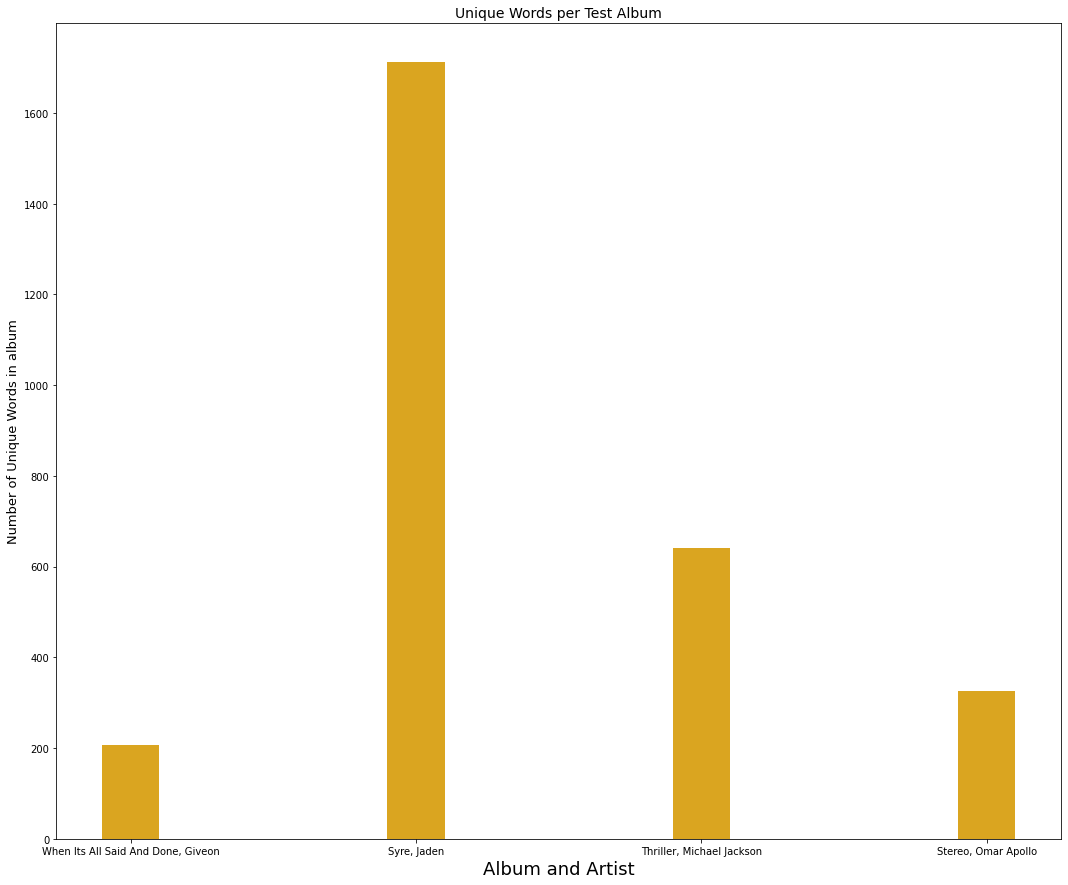

In [ ]:
import matplotlib
import matplotlib.pyplot as plt 

plt.bar(tas.keys(),tas.values(), width = .2, color = ['goldenrod'])
plt.xlabel("Album and Artist", fontsize = 18)
plt.ylabel("Number of Unique Words in album", fontsize = 13)
plt.title("Unique Words per Test Album", fontsize = 14)

plt.gcf().set_size_inches(18,15)